In [200]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('customer_history_new.csv')
# Print the shape of the DataFrame to understand its dimensions (rows, columns)
print(df.shape)
# Display the first few rows of the DataFrame for a quick overview
df.head()

(19251, 41)


,Unnamed: 0,CUSTOMER_AGE_RANGE,CUSTOMER_GENDER,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_URBAN_CODE,CUSTOMER_MARKET_GROUP,CUSTOMER_EMPLOYMENT_STATUS,CUSTOMER_MARITAL_STATUS,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS,...,CUSTOMER_SUMMARY_NON_FINANCIAL_ASSETS,CUSTOMER_SUMMARY_NUMBER_OF_MOBILE_LOGINS,CUSTOMER_SUMMARY_NUMBER_OF_LOGINS,CUSTOMER_CUSTOMER_ID,CUSTOMER_SUMMARY_END_DATE,CUSTOMER_SUMMARY_START_DATE,CUSTOMER_STATUS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.2,CUSTOMER_EFFECTIVE_DATE,CUSTOMER_RELATIONSHIP_START_DATE
0,0,40 to 55,Male,College,City,Accumulating,Employed,Married,2034.610329,0,...,0.0,99,99,1024,2018-09-30,2018-09-01,Active,180000.0,2016-07-23,2016-07-23
1,1,40 to 55,Male,College,City,Accumulating,Employed,Married,1656.750260,0,...,0.0,99,99,1024,2016-12-31,2016-12-01,Active,180000.0,2016-07-23,2016-07-23
2,2,40 to 55,Male,College,City,Accumulating,Employed,Married,954.949321,0,...,0.0,99,99,1024,2017-09-30,2017-09-01,Active,180000.0,2016-07-23,2016-07-23
3,3,40 to 55,Male,College,City,Accumulating,Employed,Married,3386.882010,0,...,0.0,99,99,1024,2016-10-31,2016-10-01,Active,180000.0,2016-07-23,2016-07-23
4,4,40 to 55,Male,College,City,Accumulating,Employed,Married,836.334713,0,...,0.0,99,99,1024,2017-07-31,2017-07-01,Active,180000.0,2016-07-23,2016-07-23


In [202]:
# Convert date columns from string to datetime format for easier manipulation

df['CUSTOMER_EFFECTIVE_DATE'] = pd.to_datetime(df['CUSTOMER_EFFECTIVE_DATE'])
df['CUSTOMER_SUMMARY_END_DATE'] = pd.to_datetime(df['CUSTOMER_SUMMARY_END_DATE'])
df['CUSTOMER_SUMMARY_START_DATE'] = pd.to_datetime(df['CUSTOMER_SUMMARY_START_DATE'])
df['CUSTOMER_RELATIONSHIP_START_DATE'] = pd.to_datetime(df['CUSTOMER_RELATIONSHIP_START_DATE'])


In [203]:
# Identify categorical variables based on their data type being object ('O')
cat_vars = [var for var in df.columns if df[var].dtype == 'O']
# Print the number of categorical variables
len(cat_vars)



8

In [204]:
# Identify numerical variables by excluding the categorical variables and a specific column 'SalePrice'
num_vars = [
    var for var in df.columns if var not in cat_vars and var != 'SalePrice'
]
# Print the number of numerical variables
len(num_vars)

33

In [205]:
# Identify variables with missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# Determine and sort the percentage of missing values for each variable
df[vars_with_na].isnull().mean().sort_values(ascending=False)

NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW                    0.772324
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME           0.772324
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH    0.732222
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH                   0.689523
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH           0.689523
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW               0.617163
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY         0.617163
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING         0.478728
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE               0.393019
dtype: float64

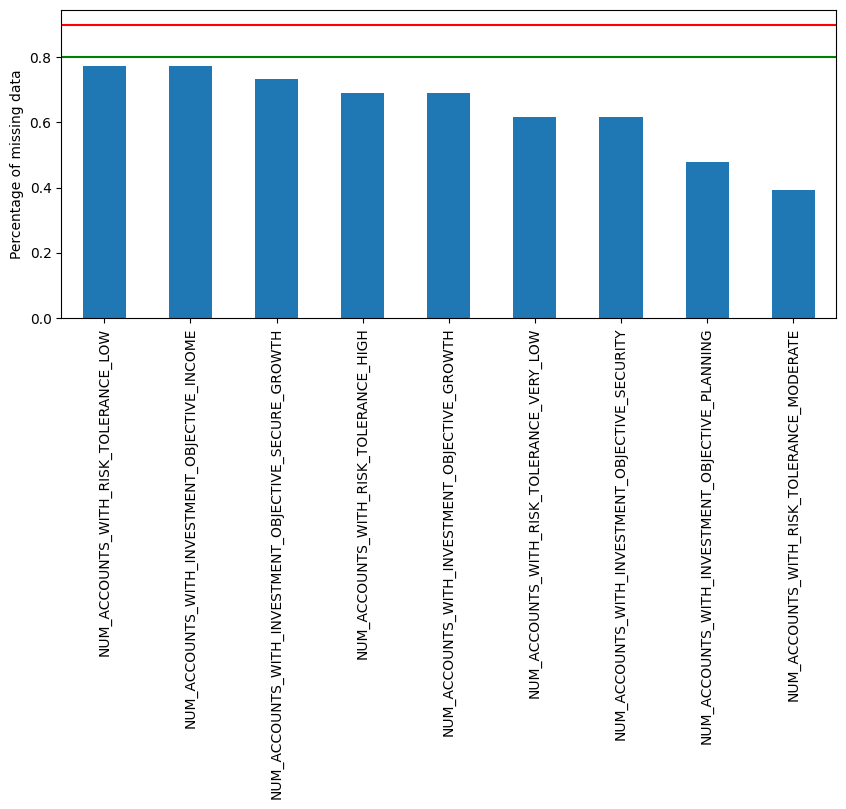

In [206]:
# Visualize the percentage of missing data for variables with missing values
df[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
# Draw horizontal lines at 90% and 80% to aid in visual analysis
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [207]:
# Identify categorical and numerical variables with missing values
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

# Print the number of categorical and numerical variables with missing values
print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  0
Number of numerical variables with na:  9


In [208]:
num_na


['NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH',
 'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW',
 'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE',
 'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW',
 'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH',
 'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME',
 'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING',
 'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH',
 'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY']

In [209]:
cat_na

[]

In [210]:
# Show a quick overview of categorical variables
df[cat_vars].head()


,CUSTOMER_AGE_RANGE,CUSTOMER_GENDER,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_URBAN_CODE,CUSTOMER_MARKET_GROUP,CUSTOMER_EMPLOYMENT_STATUS,CUSTOMER_MARITAL_STATUS,CUSTOMER_STATUS
0,40 to 55,Male,College,City,Accumulating,Employed,Married,Active
1,40 to 55,Male,College,City,Accumulating,Employed,Married,Active
2,40 to 55,Male,College,City,Accumulating,Employed,Married,Active
3,40 to 55,Male,College,City,Accumulating,Employed,Married,Active
4,40 to 55,Male,College,City,Accumulating,Employed,Married,Active


<Axes: >

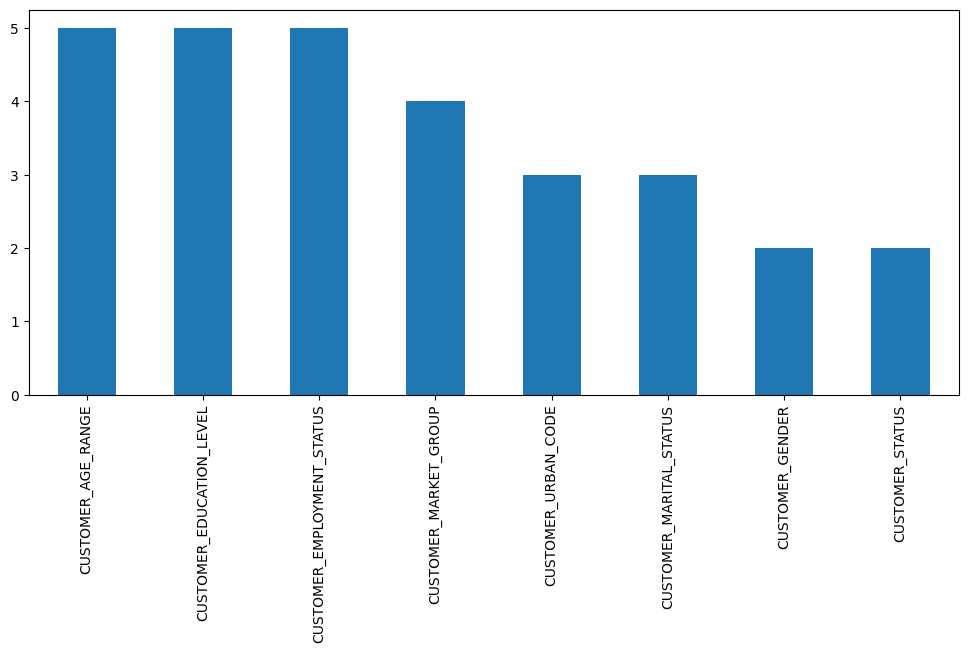

In [211]:
# Count and visualize the number of unique categories for each categorical variable
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))


In [212]:
# Print unique values for each categorical variable
for column in cat_vars:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':", unique_values)

Unique values in 'CUSTOMER_AGE_RANGE': ['40 to 55' '23 to 30' '65 and over' '55 to 65' '30 to 40']
Unique values in 'CUSTOMER_GENDER': ['Male' 'Female']
Unique values in 'CUSTOMER_EDUCATION_LEVEL': ['College' 'PhD' 'High School' 'Professional' 'University']
Unique values in 'CUSTOMER_URBAN_CODE': ['City' 'Rural' 'Urban']
Unique values in 'CUSTOMER_MARKET_GROUP': ['Accumulating' 'Starting' 'Spending' 'Gifting']
Unique values in 'CUSTOMER_EMPLOYMENT_STATUS': ['Employed' 'Homemaker' 'Retired' 'Selfemployed' 'Unemployed']
Unique values in 'CUSTOMER_MARITAL_STATUS': ['Married' 'Single' 'Divorced']
Unique values in 'CUSTOMER_STATUS': ['Active' 'Inactive']


In [213]:
# Define a list of nominal columns for one-hot encoding
nominal_cols = ['CUSTOMER_GENDER', 'CUSTOMER_URBAN_CODE', 'CUSTOMER_MARKET_GROUP', 'CUSTOMER_EMPLOYMENT_STATUS', 'CUSTOMER_STATUS']
# Perform one-hot encoding on nominal columns
data_encoded = pd.get_dummies(df, columns=nominal_cols)

# Map education levels to an ordinal scale
education_order = {'High School': 1, 'College': 2, 'University': 3, 'Professional': 4, 'PhD': 5}
data_encoded['CUSTOMER_EDUCATION_LEVEL'] = df['CUSTOMER_EDUCATION_LEVEL'].map(education_order)

# Further perform one-hot encoding on additional categorical columns
data_encoded = pd.get_dummies(data_encoded, columns=['CUSTOMER_AGE_RANGE', 'CUSTOMER_MARITAL_STATUS'])


age_range_order = {'23 to 30': 1, '30 to 40': 2, '40 to 55': 3, '55 to 65': 4, '65 and over': 5}

data_encoded.head()



,Unnamed: 0,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS,CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,CUSTOMER_ANNUAL_INCOME,CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,CUSTOMER_INTERNET_BANKING_INDICATOR,...,CUSTOMER_STATUS_Active,CUSTOMER_STATUS_Inactive,CUSTOMER_AGE_RANGE_23 to 30,CUSTOMER_AGE_RANGE_30 to 40,CUSTOMER_AGE_RANGE_40 to 55,CUSTOMER_AGE_RANGE_55 to 65,CUSTOMER_AGE_RANGE_65 and over,CUSTOMER_MARITAL_STATUS_Divorced,CUSTOMER_MARITAL_STATUS_Married,CUSTOMER_MARITAL_STATUS_Single
0,0,2,2034.610329,0,2,550000.0,4,180000.0,3,1,...,True,False,False,False,True,False,False,False,True,False
1,1,2,1656.750260,0,2,550000.0,4,180000.0,0,1,...,True,False,False,False,True,False,False,False,True,False
2,2,2,954.949321,0,2,550000.0,4,180000.0,4,1,...,True,False,False,False,True,False,False,False,True,False
3,3,2,3386.882010,0,2,550000.0,4,180000.0,0,1,...,True,False,False,False,True,False,False,False,True,False
4,4,2,836.334713,0,2,550000.0,4,180000.0,0,1,...,True,False,False,False,True,False,False,False,True,False


In [ ]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('customer_history_new.csv')
# Print the shape of the DataFrame to understand its dimensions (rows, columns)
print(df.shape)
# Display the first few rows of the DataFrame for a quick overview
df.head()

(19251, 41)


,Unnamed: 0,CUSTOMER_AGE_RANGE,CUSTOMER_GENDER,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_URBAN_CODE,CUSTOMER_MARKET_GROUP,CUSTOMER_EMPLOYMENT_STATUS,CUSTOMER_MARITAL_STATUS,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS,...,CUSTOMER_SUMMARY_NON_FINANCIAL_ASSETS,CUSTOMER_SUMMARY_NUMBER_OF_MOBILE_LOGINS,CUSTOMER_SUMMARY_NUMBER_OF_LOGINS,CUSTOMER_CUSTOMER_ID,CUSTOMER_SUMMARY_END_DATE,CUSTOMER_SUMMARY_START_DATE,CUSTOMER_STATUS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT.2,CUSTOMER_EFFECTIVE_DATE,CUSTOMER_RELATIONSHIP_START_DATE
0,0,40 to 55,Male,College,City,Accumulating,Employed,Married,2034.610329,0,...,0.0,99,99,1024,2018-09-30,2018-09-01,Active,180000.0,2016-07-23,2016-07-23
1,1,40 to 55,Male,College,City,Accumulating,Employed,Married,1656.750260,0,...,0.0,99,99,1024,2016-12-31,2016-12-01,Active,180000.0,2016-07-23,2016-07-23
2,2,40 to 55,Male,College,City,Accumulating,Employed,Married,954.949321,0,...,0.0,99,99,1024,2017-09-30,2017-09-01,Active,180000.0,2016-07-23,2016-07-23
3,3,40 to 55,Male,College,City,Accumulating,Employed,Married,3386.882010,0,...,0.0,99,99,1024,2016-10-31,2016-10-01,Active,180000.0,2016-07-23,2016-07-23
4,4,40 to 55,Male,College,City,Accumulating,Employed,Married,836.334713,0,...,0.0,99,99,1024,2017-07-31,2017-07-01,Active,180000.0,2016-07-23,2016-07-23


In [ ]:
# Convert date columns from string to datetime format for easier manipulation

df['CUSTOMER_EFFECTIVE_DATE'] = pd.to_datetime(df['CUSTOMER_EFFECTIVE_DATE'])
df['CUSTOMER_SUMMARY_END_DATE'] = pd.to_datetime(df['CUSTOMER_SUMMARY_END_DATE'])
df['CUSTOMER_SUMMARY_START_DATE'] = pd.to_datetime(df['CUSTOMER_SUMMARY_START_DATE'])
df['CUSTOMER_RELATIONSHIP_START_DATE'] = pd.to_datetime(df['CUSTOMER_RELATIONSHIP_START_DATE'])


In [ ]:
# Identify categorical variables based on their data type being object ('O')
cat_vars = [var for var in df.columns if df[var].dtype == 'O']
# Print the number of categorical variables
len(cat_vars)



8

In [ ]:
# Identify numerical variables by excluding the categorical variables and a specific column 'SalePrice'
num_vars = [
    var for var in df.columns if var not in cat_vars and var != 'SalePrice'
]
# Print the number of numerical variables
len(num_vars)

33

In [ ]:
# Identify variables with missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# Determine and sort the percentage of missing values for each variable
df[vars_with_na].isnull().mean().sort_values(ascending=False)

NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW                    0.772324
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME           0.772324
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH    0.732222
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH                   0.689523
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH           0.689523
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW               0.617163
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY         0.617163
NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING         0.478728
NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE               0.393019
dtype: float64

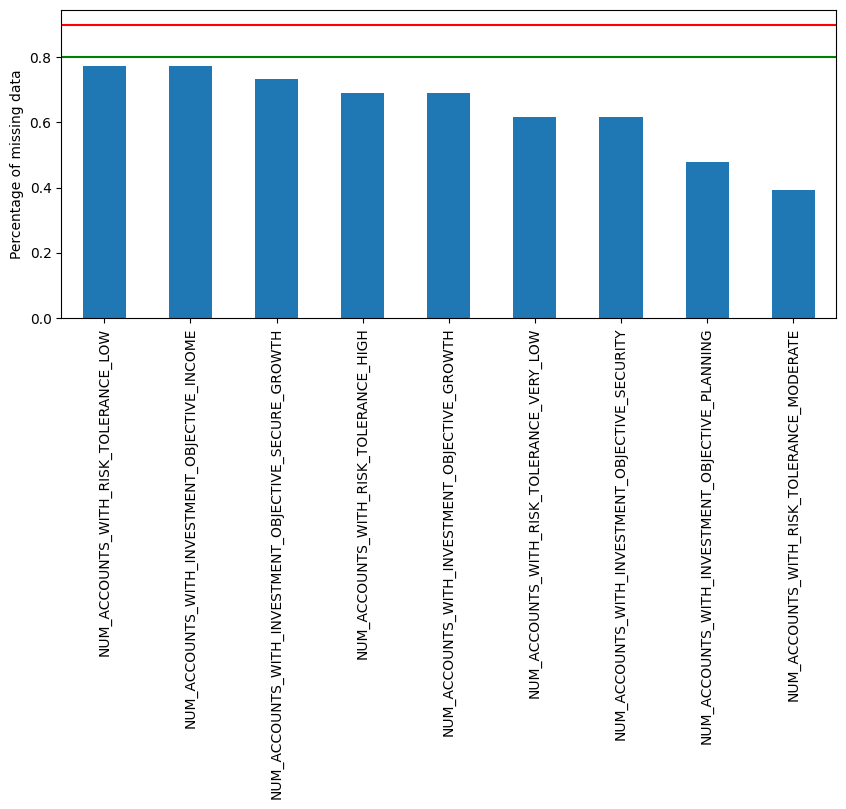

In [ ]:
# Visualize the percentage of missing data for variables with missing values
df[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
# Draw horizontal lines at 90% and 80% to aid in visual analysis
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [ ]:
# Identify categorical and numerical variables with missing values
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

# Print the number of categorical and numerical variables with missing values
print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  0
Number of numerical variables with na:  9


In [ ]:
num_na


['NUM_ACCOUNTS_WITH_RISK_TOLERANCE_HIGH',
 'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_LOW',
 'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_MODERATE',
 'NUM_ACCOUNTS_WITH_RISK_TOLERANCE_VERY_LOW',
 'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_GROWTH',
 'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_INCOME',
 'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_PLANNING',
 'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURE_GROWTH',
 'NUM_ACCOUNTS_WITH_INVESTMENT_OBJECTIVE_SECURITY']

In [ ]:
cat_na

[]

In [ ]:
# Show a quick overview of categorical variables
df[cat_vars].head()


,CUSTOMER_AGE_RANGE,CUSTOMER_GENDER,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_URBAN_CODE,CUSTOMER_MARKET_GROUP,CUSTOMER_EMPLOYMENT_STATUS,CUSTOMER_MARITAL_STATUS,CUSTOMER_STATUS
0,40 to 55,Male,College,City,Accumulating,Employed,Married,Active
1,40 to 55,Male,College,City,Accumulating,Employed,Married,Active
2,40 to 55,Male,College,City,Accumulating,Employed,Married,Active
3,40 to 55,Male,College,City,Accumulating,Employed,Married,Active
4,40 to 55,Male,College,City,Accumulating,Employed,Married,Active


<Axes: >

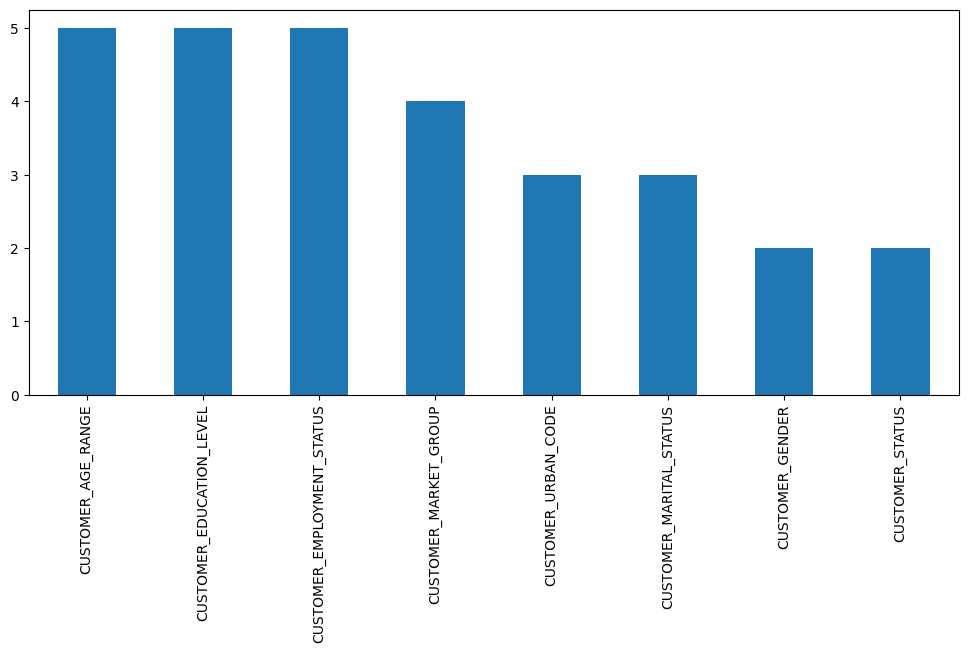

In [ ]:
# Count and visualize the number of unique categories for each categorical variable
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))


In [ ]:
# Print unique values for each categorical variable
for column in cat_vars:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':", unique_values)

Unique values in 'CUSTOMER_AGE_RANGE': ['40 to 55' '23 to 30' '65 and over' '55 to 65' '30 to 40']
Unique values in 'CUSTOMER_GENDER': ['Male' 'Female']
Unique values in 'CUSTOMER_EDUCATION_LEVEL': ['College' 'PhD' 'High School' 'Professional' 'University']
Unique values in 'CUSTOMER_URBAN_CODE': ['City' 'Rural' 'Urban']
Unique values in 'CUSTOMER_MARKET_GROUP': ['Accumulating' 'Starting' 'Spending' 'Gifting']
Unique values in 'CUSTOMER_EMPLOYMENT_STATUS': ['Employed' 'Homemaker' 'Retired' 'Selfemployed' 'Unemployed']
Unique values in 'CUSTOMER_MARITAL_STATUS': ['Married' 'Single' 'Divorced']
Unique values in 'CUSTOMER_STATUS': ['Active' 'Inactive']


In [ ]:
# Define a list of nominal columns for one-hot encoding
nominal_cols = ['CUSTOMER_GENDER', 'CUSTOMER_URBAN_CODE', 'CUSTOMER_MARKET_GROUP', 'CUSTOMER_EMPLOYMENT_STATUS', 'CUSTOMER_STATUS']
# Perform one-hot encoding on nominal columns
data_encoded = pd.get_dummies(df, columns=nominal_cols)

education_order = {'High School': 1, 'College': 2, 'University': 3, 'Professional': 4, 'PhD': 5}
data_encoded['CUSTOMER_EDUCATION_LEVEL'] = df['CUSTOMER_EDUCATION_LEVEL'].map(education_order)

data_encoded = pd.get_dummies(data_encoded, columns=['CUSTOMER_AGE_RANGE', 'CUSTOMER_MARITAL_STATUS'])

age_range_order = {'23 to 30': 1, '30 to 40': 2, '40 to 55': 3, '55 to 65': 4, '65 and over': 5}

data_encoded.head()



,Unnamed: 0,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS,CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,CUSTOMER_ANNUAL_INCOME,CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,CUSTOMER_INTERNET_BANKING_INDICATOR,...,CUSTOMER_STATUS_Active,CUSTOMER_STATUS_Inactive,CUSTOMER_AGE_RANGE_23 to 30,CUSTOMER_AGE_RANGE_30 to 40,CUSTOMER_AGE_RANGE_40 to 55,CUSTOMER_AGE_RANGE_55 to 65,CUSTOMER_AGE_RANGE_65 and over,CUSTOMER_MARITAL_STATUS_Divorced,CUSTOMER_MARITAL_STATUS_Married,CUSTOMER_MARITAL_STATUS_Single
0,0,2,2034.610329,0,2,550000.0,4,180000.0,3,1,...,True,False,False,False,True,False,False,False,True,False
1,1,2,1656.750260,0,2,550000.0,4,180000.0,0,1,...,True,False,False,False,True,False,False,False,True,False
2,2,2,954.949321,0,2,550000.0,4,180000.0,4,1,...,True,False,False,False,True,False,False,False,True,False
3,3,2,3386.882010,0,2,550000.0,4,180000.0,0,1,...,True,False,False,False,True,False,False,False,True,False
4,4,2,836.334713,0,2,550000.0,4,180000.0,0,1,...,True,False,False,False,True,False,False,False,True,False


In [ ]:
# Sort the DataFrame by customer ID and effective date for chronological analysis
data_encoded.sort_values(by=['CUSTOMER_CUSTOMER_ID','CUSTOMER_EFFECTIVE_DATE'], inplace=True)
data_encoded['CUSTOMER_EFFECTIVE_DATE'] = pd.to_datetime(data_encoded['CUSTOMER_EFFECTIVE_DATE'])

# Calculate previous month's Assets Under Management (AUM) for each customer
data_encoded['AUM_PREV_MONTH'] = data_encoded.groupby('CUSTOMER_CUSTOMER_ID')['CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT'].shift(1)

# Drop rows with missing values in 'AUM_PREV_MONTH' as they cannot be used for ratio calculation
data_encoded.dropna(subset=['AUM_PREV_MONTH'], inplace=True)

# Calculate the ratio of current month's AUM to previous month's AUM
data_encoded['RATIO'] = data_encoded['CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT'] / data_encoded['AUM_PREV_MONTH']

# Fill missing values in 'RATIO' with a placeholder (9999) for identification
data_encoded['RATIO'].fillna(9999, inplace=True) 

# Define a threshold for significant fund drop
threshold = 0.75  

# Create a binary column 'FUNDS_DROP' to flag significant drops in funds below the threshold
data_encoded['FUNDS_DROP'] = (data_encoded['RATIO'] <= threshold).astype(int)

# Determine 'ATTRITION' by combining fund drop information and customer status
data_encoded['ATTRITION'] = ((data_encoded['FUNDS_DROP'] == 1) | (data_encoded['CUSTOMER_STATUS_Inactive'] == False)).astype(int)

# Display the first 100 rows of the processed DataFrame
data_encoded.head(100)


,Unnamed: 0,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS,CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,CUSTOMER_ANNUAL_INCOME,CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,CUSTOMER_INTERNET_BANKING_INDICATOR,...,CUSTOMER_AGE_RANGE_40 to 55,CUSTOMER_AGE_RANGE_55 to 65,CUSTOMER_AGE_RANGE_65 and over,CUSTOMER_MARITAL_STATUS_Divorced,CUSTOMER_MARITAL_STATUS_Married,CUSTOMER_MARITAL_STATUS_Single,AUM_PREV_MONTH,RATIO,FUNDS_DROP,ATTRITION
18628,18628,2,956.047156,0,1,325000.0,2,100000.0,2,1,...,False,False,False,False,True,False,100000.0,1.0,0,1
18629,18629,2,857.055018,0,1,325000.0,2,100000.0,5,1,...,False,False,False,False,True,False,100000.0,1.0,0,1
18630,18630,2,1077.471084,0,1,325000.0,2,100000.0,3,1,...,False,False,False,False,True,False,100000.0,1.0,0,1
18631,18631,2,1195.445725,0,1,325000.0,2,100000.0,2,1,...,False,False,False,False,True,False,100000.0,1.0,0,1
18632,18632,2,768.523528,0,1,325000.0,2,100000.0,3,1,...,False,False,False,False,True,False,100000.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1654,1,400.499333,0,1,70000.0,3,300000.0,0,0,...,False,False,False,False,True,False,300000.0,1.0,0,1
1655,1655,1,598.288417,0,1,70000.0,3,300000.0,5,0,...,False,False,False,False,True,False,300000.0,1.0,0,1
1656,1656,1,1020.271226,0,1,70000.0,3,300000.0,5,0,...,False,False,False,False,True,False,300000.0,1.0,0,1
9807,9807,3,1543.402583,0,2,390000.0,3,180000.0,0,1,...,False,True,False,False,True,False,180000.0,1.0,0,1


In [ ]:
# logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

X = data_encoded.select_dtypes(exclude=['datetime64']).drop('ATTRITION', axis=1)
y = data_encoded['ATTRITION'] 








In [214]:

data_encoded.sort_values(by=['CUSTOMER_CUSTOMER_ID','CUSTOMER_EFFECTIVE_DATE'], inplace=True)
data_encoded['CUSTOMER_EFFECTIVE_DATE'] = pd.to_datetime(data_encoded['CUSTOMER_EFFECTIVE_DATE'])

data_encoded['AUM_PREV_MONTH'] = data_encoded.groupby('CUSTOMER_CUSTOMER_ID')['CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT'].shift(1)

data_encoded.dropna(subset=['AUM_PREV_MONTH'], inplace=True)

data_encoded['RATIO'] = data_encoded['CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT'] / data_encoded['AUM_PREV_MONTH']
data_encoded['RATIO'].fillna(9999, inplace=True) 

threshold = 0.75  
data_encoded['FUNDS_DROP'] = (data_encoded['RATIO'] <= threshold).astype(int)

data_encoded['ATTRITION'] = ((data_encoded['FUNDS_DROP'] == 1) | (data_encoded['CUSTOMER_STATUS_Inactive'] == False)).astype(int)

data_encoded.head(100)


,Unnamed: 0,CUSTOMER_EDUCATION_LEVEL,CUSTOMER_SUMMARY_TOTAL_AMOUNT_OF_DEPOSITS,CUSTOMER_NUMBER_OF_DEPENDENT_ADULTS,CUSTOMER_NUMBER_OF_DEPENDENT_CHILDREN,CUSTOMER_ANNUAL_INCOME,CUSTOMER_SUMMARY_NUMBER_OF_ACCOUNTS,CUSTOMER_SUMMARY_FUNDS_UNDER_MANAGEMENT,CUSTOMER_SUMMARY_AVERAGE_SENTIMENT_SCORE,CUSTOMER_INTERNET_BANKING_INDICATOR,...,CUSTOMER_AGE_RANGE_40 to 55,CUSTOMER_AGE_RANGE_55 to 65,CUSTOMER_AGE_RANGE_65 and over,CUSTOMER_MARITAL_STATUS_Divorced,CUSTOMER_MARITAL_STATUS_Married,CUSTOMER_MARITAL_STATUS_Single,AUM_PREV_MONTH,RATIO,FUNDS_DROP,ATTRITION
18628,18628,2,956.047156,0,1,325000.0,2,100000.0,2,1,...,False,False,False,False,True,False,100000.0,1.0,0,1
18629,18629,2,857.055018,0,1,325000.0,2,100000.0,5,1,...,False,False,False,False,True,False,100000.0,1.0,0,1
18630,18630,2,1077.471084,0,1,325000.0,2,100000.0,3,1,...,False,False,False,False,True,False,100000.0,1.0,0,1
18631,18631,2,1195.445725,0,1,325000.0,2,100000.0,2,1,...,False,False,False,False,True,False,100000.0,1.0,0,1
18632,18632,2,768.523528,0,1,325000.0,2,100000.0,3,1,...,False,False,False,False,True,False,100000.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1654,1,400.499333,0,1,70000.0,3,300000.0,0,0,...,False,False,False,False,True,False,300000.0,1.0,0,1
1655,1655,1,598.288417,0,1,70000.0,3,300000.0,5,0,...,False,False,False,False,True,False,300000.0,1.0,0,1
1656,1656,1,1020.271226,0,1,70000.0,3,300000.0,5,0,...,False,False,False,False,True,False,300000.0,1.0,0,1
9807,9807,3,1543.402583,0,2,390000.0,3,180000.0,0,1,...,False,True,False,False,True,False,180000.0,1.0,0,1


In [215]:
# logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

X = data_encoded.select_dtypes(exclude=['datetime64']).drop('ATTRITION', axis=1)
y = data_encoded['ATTRITION'] 






